# LGNPy

The package can be installed using ```pip install -e lgnpy``` from the parent folder of ```lgnpy```.

The main functionality is implemented in ```lgnpy.CEandSC.lgn_statistics``` in which the function ```lgn_statistics``` computes the CE and SC values for a given image. This function can be used to iterate over a list of images. Below, we quickly outline how to do this for an example image.
 

In [20]:
# Import lgn_statistics function

from lgnpy.CEandSC.lgn_statistics import lgn_statistics, loadmat
import os
from PIL import Image
import yaml
import numpy as np

In [7]:
home_path = os.path.expanduser('~')
home_path

'/home/niklas'

Configuration of the contrast energy (CE) and spatial coherence (SC) computation is done via a config yaml file. The path to the file can either be handed to the function or the config file can be loaded beforehand, manipulated and then handed to the function as a dictionary.

A default configuration file is given in ```lgnpy.CEandSC.default_config.yml``` and can be loaded as shown below.

In [2]:
config_path = '../lgnpy/CEandSC/default_config.yml'
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.UnsafeLoader)


In [3]:
config

{'break_off_sigma': 3,
 'viewing_dist': 1,
 'dot_pitch': 0.00035,
 'fov_beta': 1.5,
 'fov_gamma': 5,
 'eps': 1e-07,
 'parvo_sigmas': [48, 24, 12, 6, 3],
 'magno_sigmas': [64, 32, 16, 8, 4],
 'interpolation_sigmas': [1, 2, 4, 8, 16, 32],
 'n_bins_weibull': 1000,
 'color_weighting_e': [0.3, 0.58, 0.11],
 'color_weighting_el': [0.25, 0.25, -0.5],
 'color_weighting_ell': [0.5, -0.5, 0.0]}

In [24]:
threshold_lgn = loadmat(filepath='../ThresholdLGN.mat')['ThresholdLGN']

Could not load mat file with mat73 - trying to load with scipy.io.loadmat!


In [14]:
im = Image.open('../example_image.tiff').reduce(8)

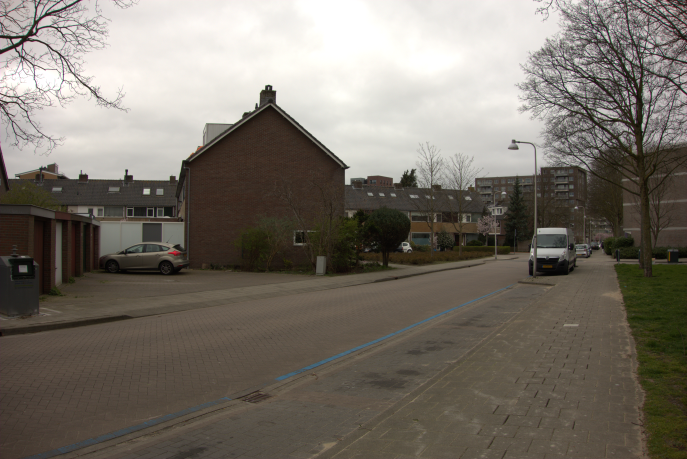

In [15]:
im

In [26]:
ce, sc, beta, gamma = lgn_statistics(im=np.array(im), file_name='exampe_image.tiff', config=config, force_recompute=True, cache=False, home_path=home_path, threshold_lgn=threshold_lgn)

Computing LGN statistics for exampe_image.tiff


In [46]:
ce.shape

(3, 1, 2)

There are 4 arrays being returned. Each of them is of shape (3,1,2) corresponding to the three color opponent channels (intensity, red-green, blue-yellow), the number of crops for which CE/SC are additionally computed, and center vs. peripherie. The last two dimensions can be ignored here, as more configurations are need in order to compute those statistics.

The four array correspond to CE, SC, beta and gamma, respectively. Beta and gamma are the parameters of a Weibull distribution fit and CE and SC are the described scene statistics.

# Advanced

In [37]:
from lgnpy.CEandSC.lgn_statistics import get_edge_maps, LGN

In [34]:
im = np.array(im)

In [35]:
imsize = np.array(im).shape[:2]

if im.shape[-1] == 2:
    IMTYPE = 1  # Gray
elif im.shape[-1] == 3:
    IMTYPE = 2  # Color
else:
    IMTYPE = 1

In [36]:
imsize, IMTYPE

((459, 687), 2)

In [38]:
lgn = LGN(config=config, default_config_path='/home/niklas/projects/lgnpy/lgnpy/CEandSC/default_config.yml')

In [39]:
edge_map = get_edge_maps(im=im, cache=False, file_name='example_image.tiff', imsize=imsize, IMTYPE=IMTYPE, force_recompute=True, threshold_lgn=threshold_lgn, lgn=lgn)

In [43]:
import matplotlib.pyplot as plt

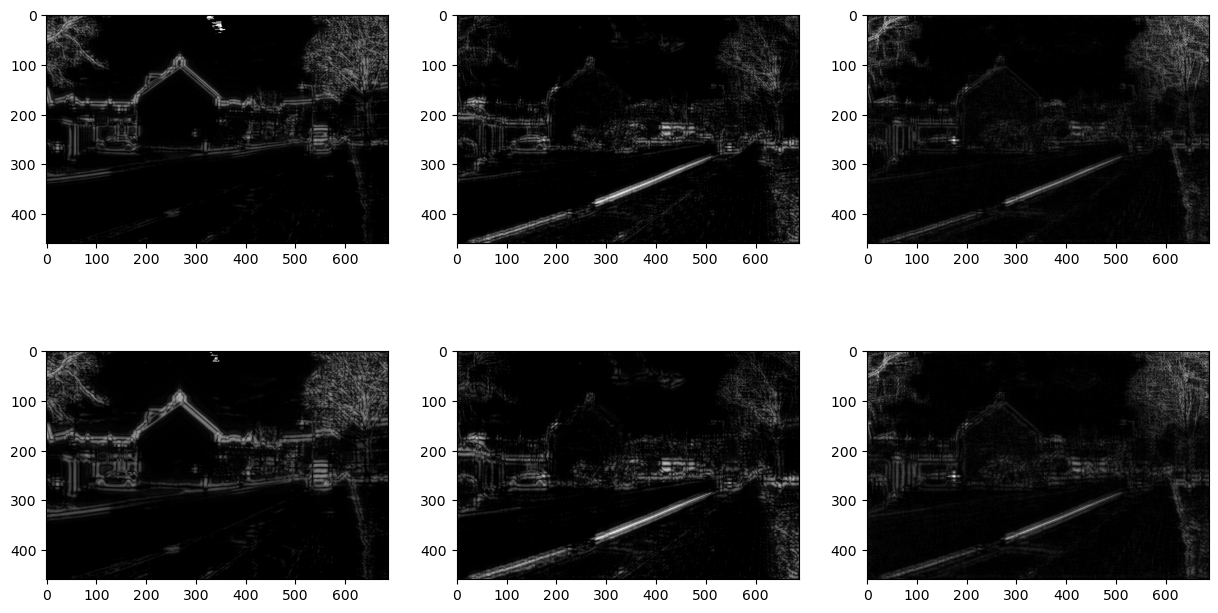

In [45]:
fig, ax = plt.subplots(2,3, figsize=(15,8))

ax[0, 0].imshow(edge_map[0], cmap='gray') # Parvo I
ax[0, 1].imshow(edge_map[1], cmap='gray') # Parvo RG
ax[0, 2].imshow(edge_map[2], cmap='gray') # Parvo BY
ax[1, 0].imshow(edge_map[3], cmap='gray') # Magno I
ax[1, 1].imshow(edge_map[4], cmap='gray') # Magno RG
ax[1, 2].imshow(edge_map[5], cmap='gray') # Magno BY

plt.show()